<a href="https://colab.research.google.com/github/Ron-Tagne/COVID-19-Mexico-/blob/main/Stats_Group23_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import io
import requests
import warnings
import math
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import chi2_contingency


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Stats Group Project/Covid Data Mexico.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [8]:
df['CLASIFFICATION_FINAL'].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [9]:
df['TOBACCO'].value_counts()

2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64

In [10]:
mode(df['TOBACCO'])

2

In [11]:
# Treat missing values- mode imputation
tobacco = df['TOBACCO']
for i in range(len(tobacco)):
  if tobacco [i] == 98:
    tobacco[i] = 2

print(tobacco.value_counts())

2    964199
1     84376
Name: TOBACCO, dtype: int64


In [12]:
# Map CLASSIFICATION_FINAL to HAS_COVID; (1 to 3) => COVID positive => 1, else 2 => Negative 
df['COVID_STATUS'] = [1 if each < 4 else 2 for each in df['CLASIFFICATION_FINAL']]

## Univariate Analysis (UA)


### UA- Covid Status

In [13]:
df['COVID_STATUS'].value_counts()

2    656596
1    391979
Name: COVID_STATUS, dtype: int64

<Axes: xlabel='COVID_STATUS', ylabel='count'>

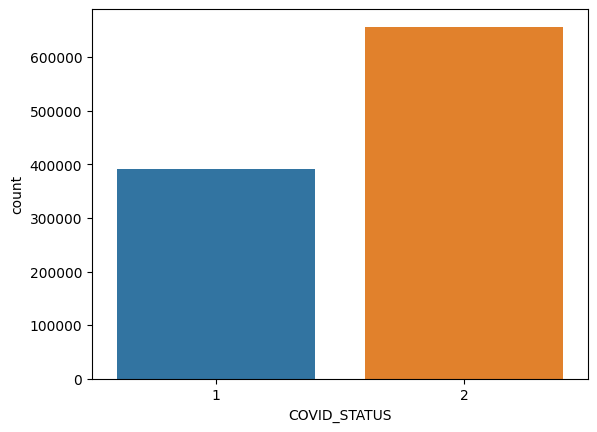

In [14]:
# Covid Status
sns.countplot(x=df['COVID_STATUS'])

UN- Tobacco

In [15]:
df['TOBACCO'].value_counts()

2    964199
1     84376
Name: TOBACCO, dtype: int64

<Axes: xlabel='TOBACCO', ylabel='count'>

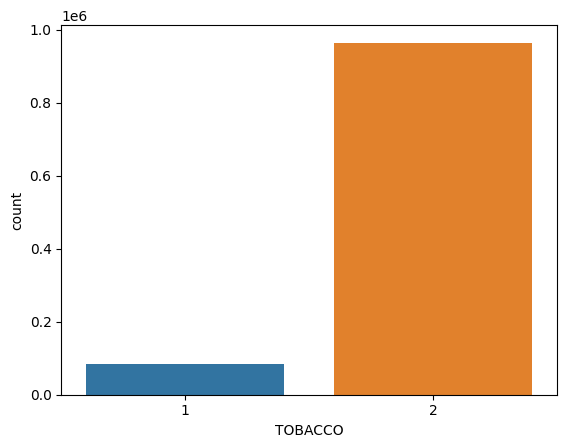

In [16]:
sns.countplot(x=df['TOBACCO'])

## Bivariate Analysis

In [19]:
#a ClASSIFICATION_FINAL value of <= 3 indicates the patient had a POSITIVE Covid diagnosis

df.loc[df['CLASIFFICATION_FINAL'] >= 4, 'COVID_STATUS'] = 'Negative' 
df.loc[df['CLASIFFICATION_FINAL'] <= 3, 'COVID_STATUS'] = 'Positive' 

#TOBACCO value of 1 indicates the patient IS a tobacco user

df.loc[df['TOBACCO']==1, 'TOBACCO_USER'] = 'Yes' 
df.loc[df['TOBACCO']==2, 'TOBACCO_USER'] = 'No' 

#create contingency table
ct = pd.crosstab(index=df['TOBACCO_USER'], columns=df['COVID_STATUS'], margins=True)

ct

COVID_STATUS,Negative,Positive,All
TOBACCO_USER,,,
No,600967,363232,964199
Yes,55629,28747,84376
All,656596,391979,1048575


Two-way Contingency Table Interpretation:


1.   List item

2.   List item
3.   List item


4.   List item



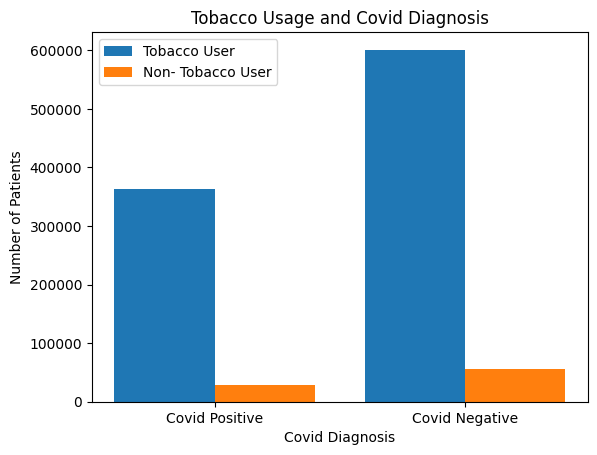

In [20]:
# Visualizing contingency values

X = ['Covid Positive', 'Covid Negative']
Tobacco_User = [363232,600967]
Not_Tobacco_User = [28747,55629]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Tobacco_User, 0.4, label = 'Tobacco User')
plt.bar(X_axis + 0.2, Not_Tobacco_User, 0.4, label = 'Non- Tobacco User')
  
plt.xticks(X_axis, X)
plt.xlabel("Covid Diagnosis")
plt.ylabel("Number of Patients")
plt.title("Tobacco Usage and Covid Diagnosis")
plt.legend()
plt.show()

Statstical Assumptions:

1. Independence: Observations in the dataset are independent of each other

2. Sample size: The number of observations in each cell within the contingency table is are greater that five in each cell.

3. Categorical variables: The variables observed (COVID_STATUS & TOBACCO) are both categorical variables

4. Nominal or ordinal data: The values in the dataset are mutually exclusive of one another and are nominal.

5. No significant outliers: For the variables observed there were no outliers.

Therefore, since all statstical assumptions for a chi-squared goodness and fit test are met, a statstical analysis can be performed.

### Statstical Analysis

In [21]:
# Determine whether there is an association
# Chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(ct)

#Results
print("Chi-Square Test of Independence Summary:")
print("---------------------------------------")
print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_val:.3f}")
print("Expected frequencies:")
print(expected)


Chi-Square Test of Independence Summary:
---------------------------------------
Chi-square statistic: 429.989
Degrees of freedom: 4
P-value: 0.000
Expected frequencies:
[[ 603761.49212407  360437.50787593  964199.        ]
 [  52834.50787593   31541.49212407   84376.        ]
 [ 656596.          391979.         1048575.        ]]


A p-value of 9.192972063342544e-92 indicates strong evidence of an association between smoking tobacco and the risk of being diagnosed with COVID-19. This extremely low p-value suggests that the observed association between smoking and COVID-19 is unlikely to have occurred by chance.

However, it is important to note that a statistically significant association does not necessarily imply a causal relationship between smoking and COVID-19. Other factors could be involved that contribute to the observed association. Additionally, it is possible that the association between smoking and COVID-19 is confounded by other factors that are associated with both smoking and COVID-19, such as age or underlying health conditions.

Therefore, while the statistical evidence supports an association between smoking and COVID-19, additional research is needed to establish a causal relationship and to identify the specific mechanisms underlying the observed association.

In [22]:
# Measure the magnitude of association
a = 28747  # frequency of With COVID and Smoke
b = 55629   # frequency of No COVID and Smoke
c = 363232   # frequency of With COVID and do not Smoke
d = 600967   # frequency of No COVID and do not Smoke

odds_ratio = (a*d) / (b*c)

print(f"Odds ratio: {odds_ratio}")

Odds ratio: 0.8549836285941482


Contradiction. This would arise due to the fact that there are several confounders.